<a href="https://colab.research.google.com/github/kalinkabel/Exercicios_Data_Science/blob/main/AVC_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import imblearn
import matplotlib.pyplot as plt
import plotly 
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
# Definindo o renderizador:
import plotly.io as pio
pio.renderers.default = 'colab'

In [45]:
#Importar o conjunto de dados
dados_avc = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [46]:
#Explorando o conjunto de dados
dados_avc.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [47]:
dados_avc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [48]:
#checando missing values
dados_avc.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [49]:
dados_avc.dropna(inplace=True)

In [50]:
dados_avc.describe()

id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [51]:
#Remove id 
ndavc = dados_avc.drop(['id'], axis=1)

# **Visualização**

<Axes: xlabel='stroke', ylabel='count'>

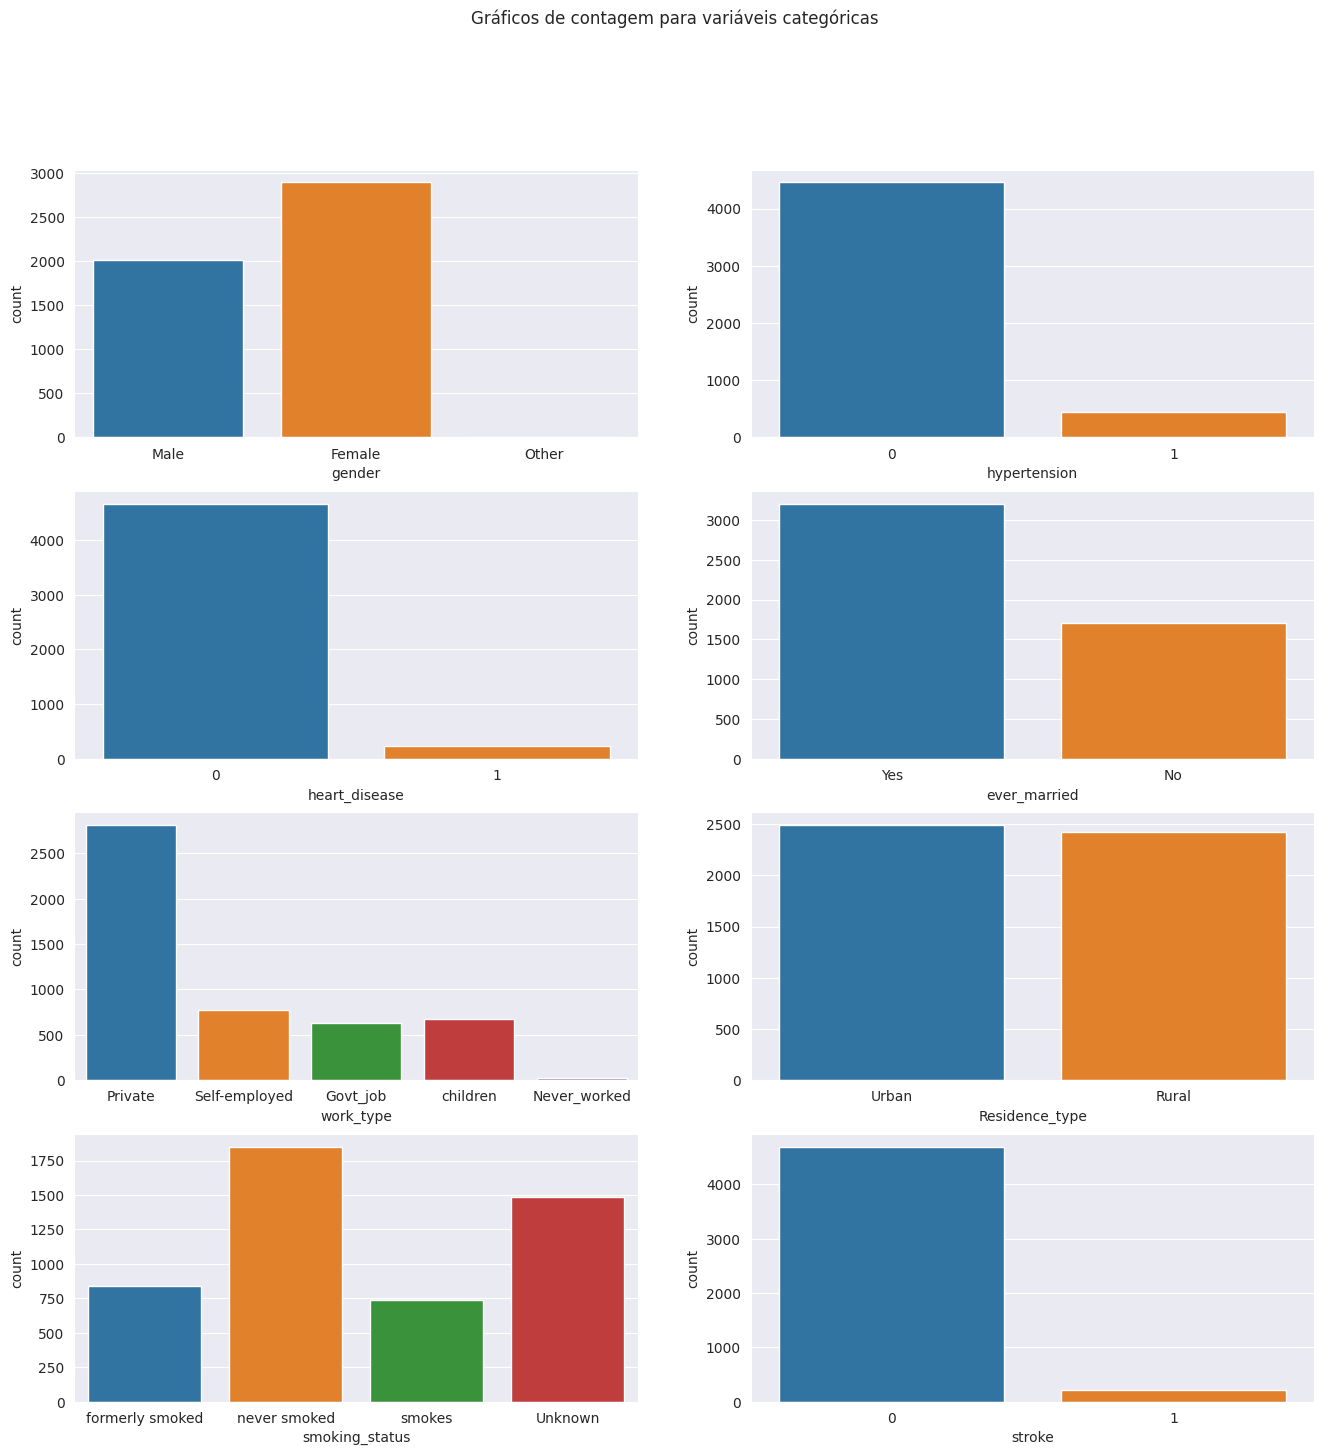

In [52]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Gráficos de contagem para variáveis categóricas")
sns.countplot(ax=axes[0,0],data=ndavc,x='gender')
sns.countplot(ax=axes[0,1],data=ndavc,x='hypertension')
sns.countplot(ax=axes[1,0],data=ndavc,x='heart_disease')
sns.countplot(ax=axes[1,1],data=ndavc,x='ever_married')
sns.countplot(ax=axes[2,0],data=ndavc,x='work_type')
sns.countplot(ax=axes[2,1],data=ndavc,x='Residence_type')
sns.countplot(ax=axes[3,0],data=ndavc,x='smoking_status')
sns.countplot(ax=axes[3,1],data=ndavc,x='stroke')

In [53]:
#Removendo o other da coluna gender
ndavc.drop(ndavc[ndavc['gender'] == 'Other'].index, inplace = True)
ndavc["gender"].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [54]:
#plota boxplot para visualização da escala dos dados e outliers
ndavc.iplot(kind='box')

In [55]:
df = px.data_frame = ndavc[['bmi','avg_glucose_level']]
fig = px.box(df, y=['bmi','avg_glucose_level'])
fig.show()

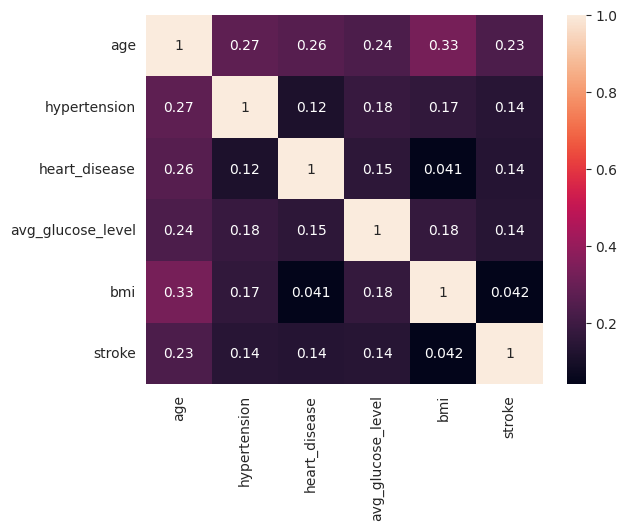

In [56]:
#visualizando a correlação das colunas
ax = sns.heatmap(ndavc.corr(), annot=True)

In [57]:
#Histograma da variável gender 
ndavc['gender'].iplot(kind='hist',colors='Blue')

In [58]:
#Histograma da variável age
ndavc['age'].iplot(kind='hist',colors='Blue')

In [59]:
#Distribuição da coluna Age
age = list(ndavc['age'].values)
hist_data = [age]
group_labels = ['age']
colors = ['#835AF1']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout(title_text = 'Distribuição da Coluna Age')
fig.show()

In [60]:
#Distribuição da coluna bmi
bmi = list(ndavc['bmi'].values)
hist_data = [bmi]
group_labels = ['bmi']
colors = ['red']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True, colors=colors)
fig.update_layout(title_text = 'Distribuição da Coluna Bmi')
fig.show()

In [61]:
#Distribuição da coluna avg_glucose_level
avg_glucose_level = list(ndavc['avg_glucose_level'].values)
hist_data = [avg_glucose_level]
group_labels = ['avg_glucose_level']
colors = ['#2BCDC1']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout(title_text = 'Distribuição da Coluna avg_glucose_level')
fig.show()

<Axes: xlabel='age', ylabel='avg_glucose_level'>

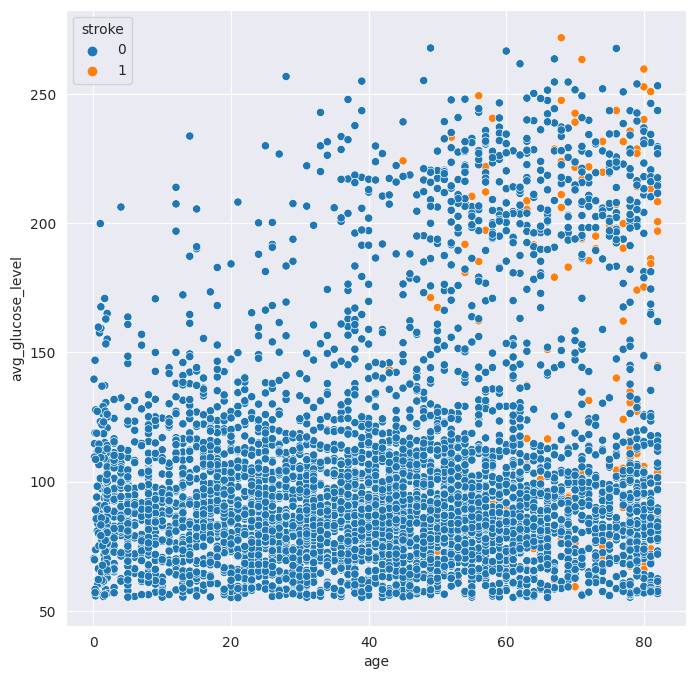

In [62]:
#scatterplot das variáveis age e avg_glucose_level com a target stroke
plt.figure(figsize=(8,8))
sns.scatterplot(x='age', y='avg_glucose_level', data = ndavc, hue = 'stroke')

<Axes: xlabel='age', ylabel='bmi'>

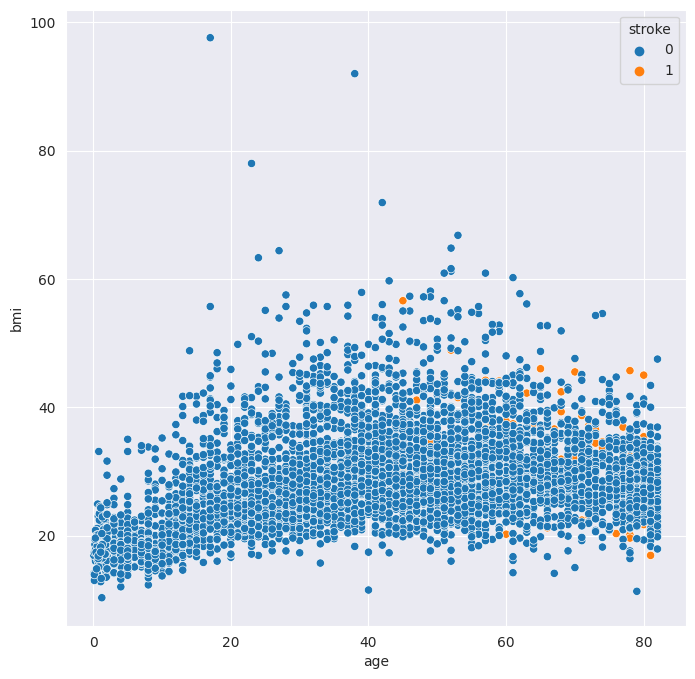

In [63]:
#scatterplot das variáveis age e bmi com a target stroke
plt.figure(figsize=(8,8))
sns.scatterplot(x='age', y='bmi', data = ndavc, hue = 'stroke')

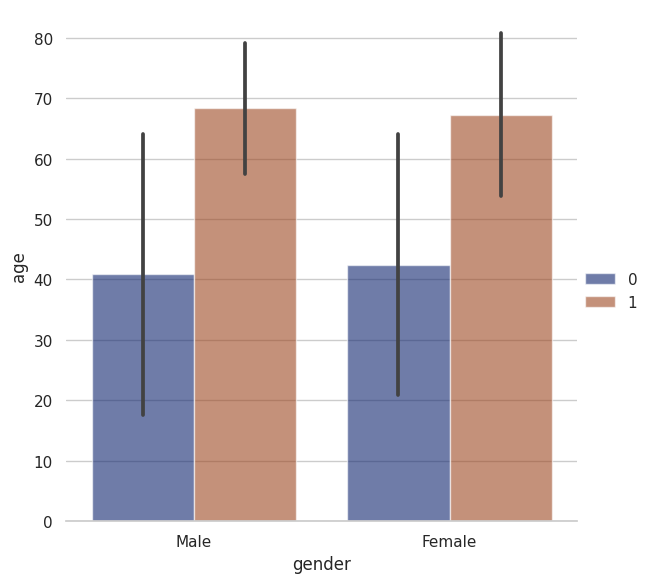

In [64]:
#catplot das variáveis age e gender com a target stroke
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=ndavc, kind="bar",
    x="gender", y="age", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.legend.set_title("")

<Figure size 1600x1600 with 0 Axes>

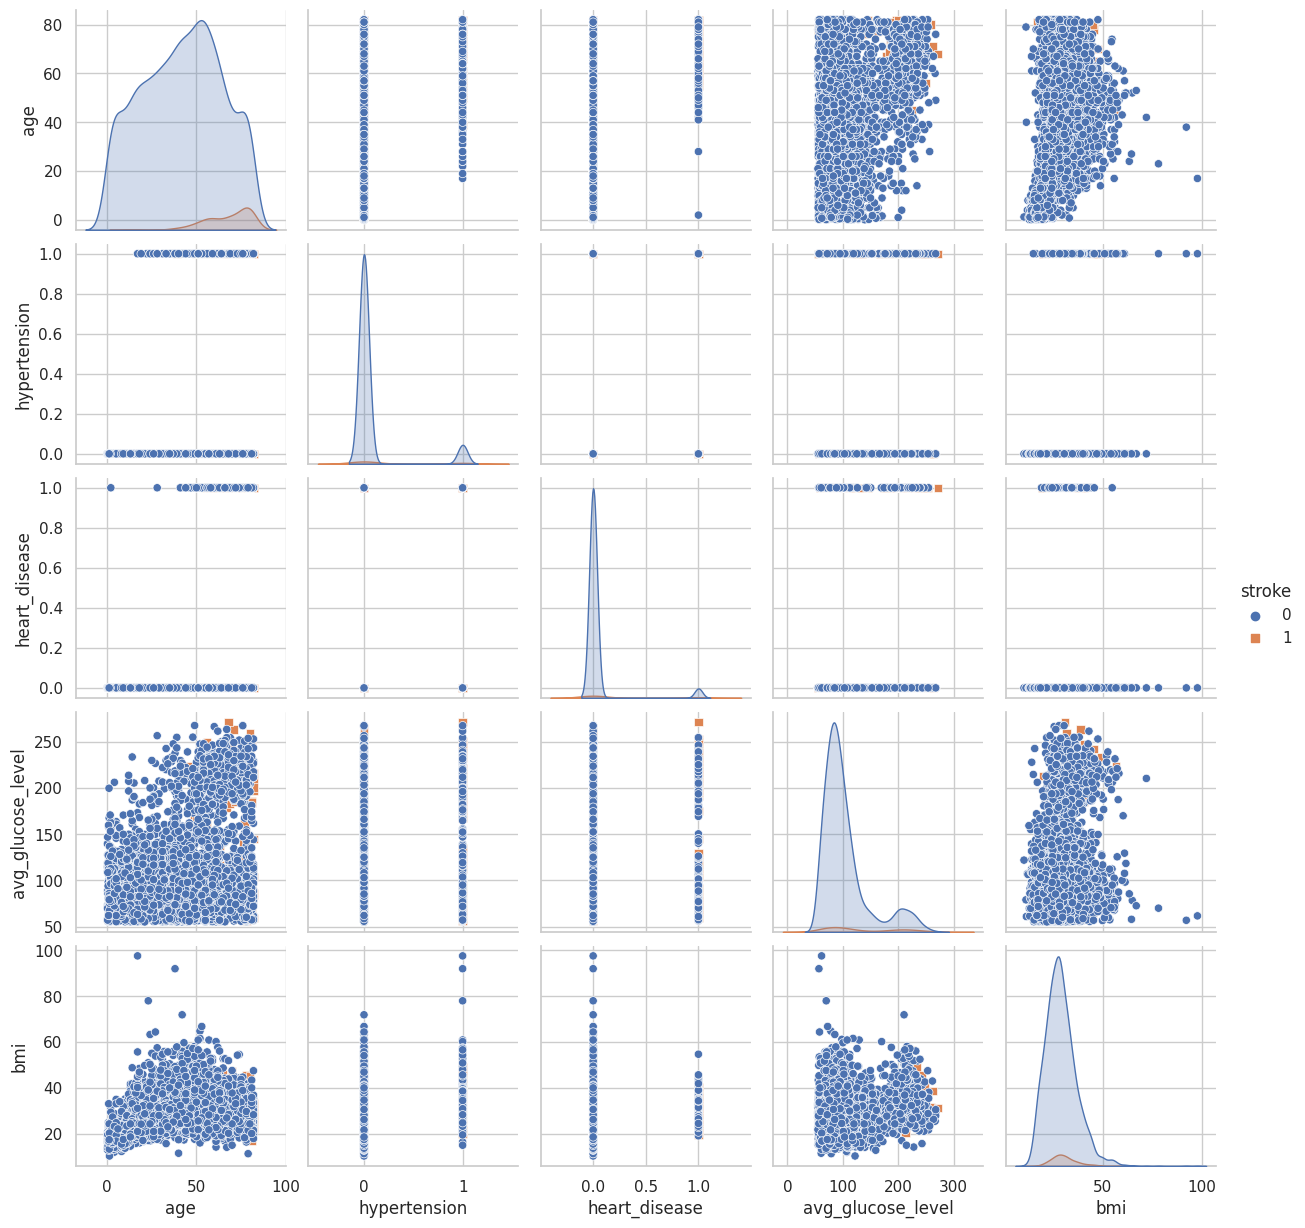

In [65]:
plt.figure(figsize = (16,16))
sns.pairplot(ndavc, hue="stroke", markers=["o", "s"])


**Visualizando a distribuição das classes**

Verificando o desbalanceamento

In [66]:
classe= ndavc.stroke.value_counts()

In [67]:
trace = go.Pie(labels= classe.index,
               values= classe.values,
               marker={'line':{'color':'#000000', 'width':2}},
               hoverinfo= 'label+percent+ value',
               pull = [0,0.06]
               )

data = [trace]

layout = go.Layout(title='Stroke')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# **Pré-processamento da base de dados**

In [68]:
cond1 = ndavc['bmi'] > 47
cond2 = ndavc['stroke'] == 0
print("O número de outliers BMI em Stroke = 0 : ", ndavc[cond1 & cond2].shape)
cond3 = ndavc['avg_glucose_level'] > 170
cond4 = ndavc['stroke'] == 0
print("O número de outliers avg_glucose_level em Stroke = 0 : ", ndavc[cond3 & cond4].shape)

O número de outliers BMI em Stroke = 0 :  (114, 11)
O número de outliers avg_glucose_level em Stroke = 0 :  (489, 11)


In [69]:
print("O shape antes da remoção de BMI outliers : ",ndavc.shape)
ndavc.drop(ndavc[cond1 & cond2].index, inplace = True)
print("O shape depois da remoção de BMI outliers :",ndavc.shape)  

O shape antes da remoção de BMI outliers :  (4908, 11)
O shape depois da remoção de BMI outliers : (4794, 11)


In [70]:
print("O shape antes da remoção de avg_glucose_level outliers :  ",ndavc.shape)
ndavc.drop(ndavc[cond3 & cond4].index, inplace = True)
print("O shape depois da remoção de avg_glucose_level outliers :",ndavc.shape)

O shape antes da remoção de avg_glucose_level outliers :   (4794, 11)
O shape depois da remoção de avg_glucose_level outliers : (4333, 11)


In [71]:
df = px.data_frame = ndavc[['bmi','avg_glucose_level']]
fig = px.box(df, y=['bmi','avg_glucose_level'])
fig.show()

In [72]:
#Separa dados e suas classes
X = ndavc.drop('stroke', axis = 1)
y = ndavc['stroke']

In [73]:
cols= ['gender','ever_married','Residence_type']

In [74]:
#Transforma Variável para numérica usando LabelEncoder()
labelEncoder = LabelEncoder()
X[cols] = X[cols].apply(labelEncoder.fit_transform)

In [75]:
#Transforma Variável para numérica usando OneHotEncoder()
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), ['work_type','smoking_status'])],remainder='passthrough')
x = ct.fit_transform(X)
x

array([[  0.  ,   0.  ,   1.  , ...,   1.  , 228.69,  36.6 ],
       [  0.  ,   0.  ,   1.  , ...,   0.  , 105.92,  32.5 ],
       [  0.  ,   0.  ,   1.  , ...,   1.  , 171.23,  34.4 ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  82.99,  30.6 ],
       [  0.  ,   0.  ,   1.  , ...,   0.  , 166.29,  25.6 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,  85.28,  26.2 ]])

In [76]:
X.shape,y.shape

((4333, 10), (4333,))

In [77]:
#importa o StandardScaler da scikit-learn
from sklearn import preprocessing

In [78]:
#cria o objeto scaler 
#aplicando o padronizador nos dados
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.37811399, -0.07143686,  0.8713419 , ...,  0.9837462 ,
         4.87346759,  1.2936871 ],
       [-0.37811399, -0.07143686,  0.8713419 , ..., -1.01652235,
         0.44295664,  0.68493248],
       [-0.37811399, -0.07143686,  0.8713419 , ...,  0.9837462 ,
         2.7998571 ,  0.96703828],
       ...,
       [-0.37811399, -0.07143686, -1.14765513, ..., -1.01652235,
        -0.38453881,  0.40282668],
       [-0.37811399, -0.07143686,  0.8713419 , ..., -1.01652235,
         2.6215829 , -0.33955701],
       [ 2.64470508, -0.07143686, -1.14765513, ...,  0.9837462 ,
        -0.30189753, -0.25047097]])

In [79]:
#Transforma em dataframe os dados padronizados
x_ndavc = pd.DataFrame(x)

In [80]:
#visualizando os boxplot dos dados padronizados.
x_ndavc.iplot(kind='box')

**Separando porção de treino e teste**

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**Aplicando RandomUnderSample**

In [82]:
from imblearn.under_sampling import RandomUnderSampler

In [83]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(x_train, y_train)

In [84]:
print(y_train.value_counts()) #divisão conjunto de dados desbalanceada

0    2888
1     145
Name: stroke, dtype: int64


In [85]:
print(y_res.value_counts()) #divisão conjunto de dados após undersample

0    145
1    145
Name: stroke, dtype: int64


**Aplicando MAchine Learning no Modelo**

In [ ]:
model1 = GaussianNB()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier(n_neighbors = 4)
model4 = SVC(kernel = 'rbf',  random_state = 2)
model5 = RandomForestClassifier(random_state=5)
modelo_ensemble = VotingClassifier(estimators=[('nb', model1),('dt', model2),('knn', model3),('svc',model4),('rfc',model5)]) 
modelo_ensemble.fit(X_res, y_res)

**Validação do Modelo**

In [87]:
#Checa a acurácia do modelo
modelo_ensemble.score(x_test, y_test)

0.73

**Cross Validation**

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
clf_ensemble = VotingClassifier(estimators=[('nb', model1),('dt', model2),('knn', model3),('svc',model4),('rfc',model5)]) 
cv_scores = cross_val_score(clf_ensemble, x, y, cv=10)

In [90]:
cv_scores.mean()

0.9681495514096273

**Relatório de Classificação**

In [91]:
modelo_ensemble.fit(X_res,y_res)
y_pred = modelo_ensemble.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1236
           1       0.14      0.89      0.24        64

    accuracy                           0.73      1300
   macro avg       0.57      0.81      0.54      1300
weighted avg       0.95      0.73      0.81      1300



**Matriz de Confusão**

In [92]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1   All
Real                   
0        890  346  1236
1          7   57    64
All      897  403  1300


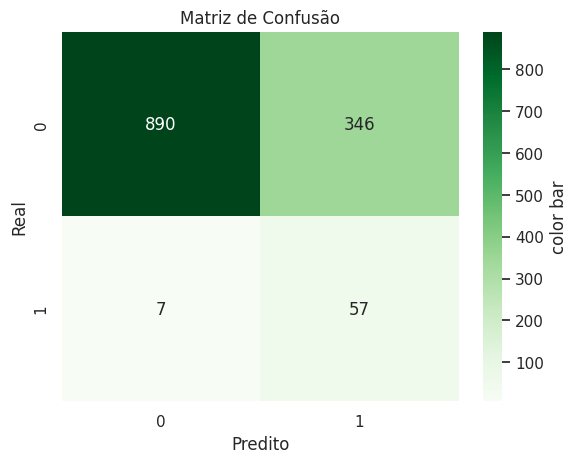

In [93]:
cm = confusion_matrix(y_test, y_pred,labels=[0,1])
sns.heatmap(cm,cmap="Greens", annot=True,fmt="d", 
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()